# 3. 실습 : RDKit을 이용하여 

RDKit 데이터를 사용하여 분자 구조를 벡터화하고 QSAR 예측 모델을 만들어 생명과학에 쓰이는 머신러닝을 실습해보았습니다.
- 


In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# 예제 데이터
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


정확도: 95.61%
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



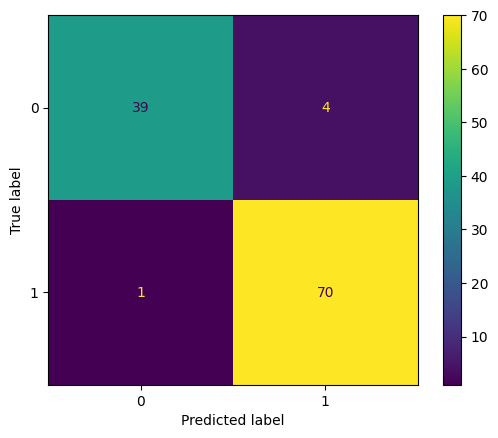

<Figure size 640x480 with 0 Axes>

In [16]:
# 예제 데이터 학습 및 평가
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("정확도: {:.2f}%".format(score*100))
print(classification_report(y_test, y_pred))

# import matplotlib.pyplot as plt
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
plt.savefig("image/breast_cancer__lr.png")

| 실제\예측 | 예측=악성(0) | 예측=양성(1) |
| -- | -- | -- |
| **실제=악성(0)** | TP (진짜 환자를 환자로 예측) | FN (환자인데 정상이라고 예측)  |
| **실제=양성(1)** | FP (정상인데 환자라고 예측)  | TN (진짜 정상을 정상으로 예측) |

*TP : True Positive
*FN : False Negative